In [17]:
import scipy
import os
from scipy.io import loadmat
def load_matrix(file):
  data = loadmat(file)
  return data['train'], data['trainlabel']

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import random

def perceptron_ans(train, trainlabel, max_epochs=2000, step_size = 1):
    """ PERCEPTRON performs perceptron learning algorithm for binary
     classification (online version).
     TRAIN provides the training data for the perceptron. It is a n by d
     matrix. n is the number of samples and d is the dimension of the data.
     TRAINLABEL provides the label (-1 or 1) for TRAIN. It is an n-by-1 vector.
     The function outputs weights (w(1) is the weight for the bias unit). It
     is a d+1 by 1 vector.
     OUTPUT: "w", the weights of the perceptron."""

    #get dimensions of data matrix
    n = train.shape[0]
    d = train.shape[1]

    #appending the bias coefficient (1) to each data point
    train = np.concatenate([np.ones((n,1)), train],axis=1)

    #--------Your code below-----------
    # Initialize weights to zero
    w = np.zeros((d+1, 1))

    # Training loop
    for epoch in range(max_epochs):
        # Shuffle the data (use np.random.permutation to get a random order)
        indices = np.random.permutation(n)
        train_shuffled = train[indices]
        trainlabel_shuffled = trainlabel[indices]

        # Go through each sample in the shuffled data
        for i in range(n):
            x_i = train_shuffled[i, :].reshape(-1, 1)  # Current input sample (with bias)
            y_i = trainlabel_shuffled[i]  # Current label

            # Perceptron update rule
            if np.dot(w.T, x_i) * y_i <= 0:  # Misclassified sample
                w += y_i * x_i * step_size  # Update the weights

    return w

###1B)
LoadData0a.mat, make a scatterplot, and determine linear separability.

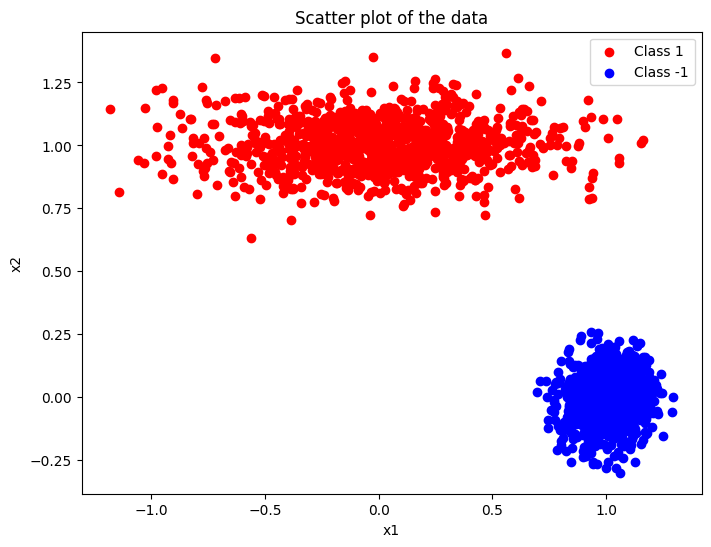

In [19]:
train0a, trainlabel0a = load_matrix('Data0a.mat')

class1 = np.array([train0a[x] for x in range(len(train0a)) if trainlabel0a[x][0] == 1])
class2 = np.array([train0a[x] for x in range(len(train0a)) if trainlabel0a[x][0] == -1])

# Scatter plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='r', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='b', label='Class -1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Scatter plot of the data')
plt.show()

The red and blue data seems to be linearly separable. Let's see how our perceptron does...

---



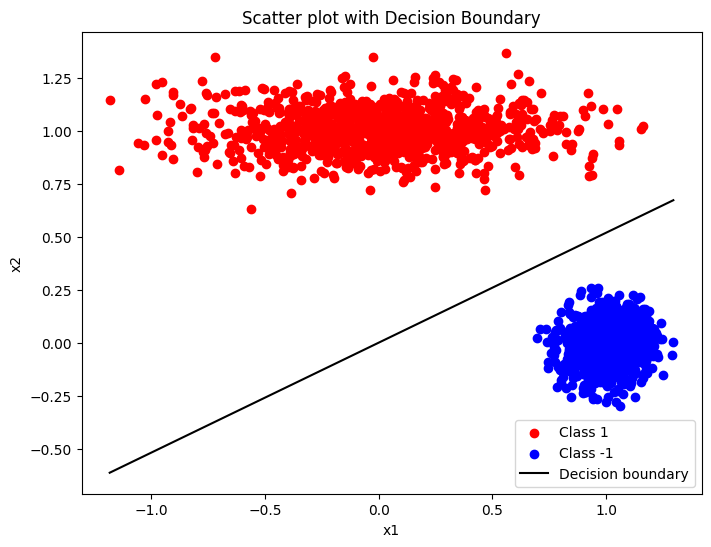

In [20]:
w0a = perceptron_ans(train0a, trainlabel0a, max_epochs=100, step_size=1)

# Plot the decision boundary
x_range = np.linspace(min(train0a[:, 0]), max(train0a[:, 0]), 100)  # Range of x values
y_range = -(w0a[0] + w0a[1] * x_range) / w0a[2]  # Solve for y: u^T w = 0

# Scatter plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='r', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='b', label='Class -1')
# Plot the decision boundary
plt.plot(x_range, y_range, 'k-', label='Decision boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Scatter plot with Decision Boundary')
plt.show()

Running this multiple times does result in slightly different results. In fact, if I initialized the weights with random values,the differences would also be a lot more notieceable, but this is because there's a huge margin for acceptable boundaries!

1c. Experimenting with step size for data0b.mat

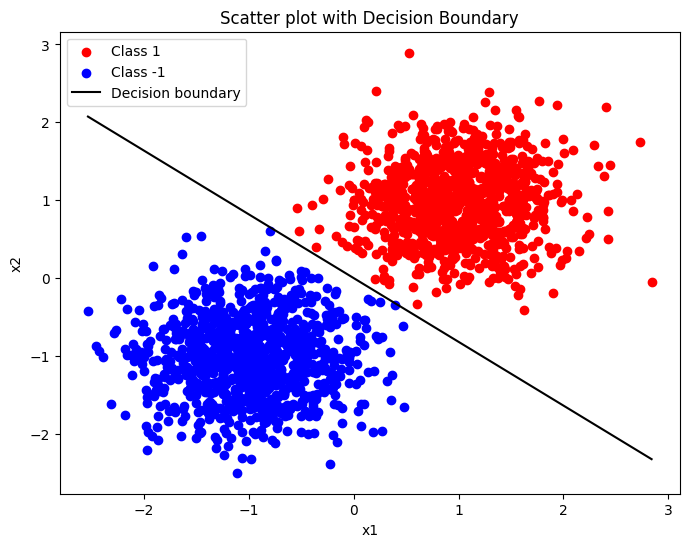

In [21]:
train0b, trainlabel0b = load_matrix('Data0b.mat')
w0b = perceptron_ans(train0b, trainlabel0b, max_epochs=300, step_size=0.1)

# Plot the decision boundary
x_range_b = np.linspace(min(train0b[:, 0]), max(train0b[:, 0]), 100)  # Range of x values
y_range_b = -(w0b[0] + w0b[1] * x_range_b) / w0b[2]  # Solve for y: u^T w = 0

# Scatter plot the data points
class1 = np.array([train0b[x] for x in range(len(train0b)) if trainlabel0b[x][0] == 1])
class2 = np.array([train0b[x] for x in range(len(train0b)) if trainlabel0b[x][0] == -1])

plt.figure(figsize=(8, 6))
plt.scatter(class1[:, 0], class1[:, 1], color='r', label='Class 1')
plt.scatter(class2[:, 0], class2[:, 1], color='b', label='Class -1')
# Plot the decision boundary
plt.plot(x_range_b, y_range_b, 'k-', label='Decision boundary')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Scatter plot with Decision Boundary')
plt.show()

The main difference is that the convergence is a lot closer to one of the groups (which makes sense when the slope of the line isn't changing as much each iteration). A smaller step size makes sense because it doesn't take a lot of iterations to find an acceptable boundary, and the margin of error for acceptable boundaries is a lot smaller than in the previous example.

### 1d. Data1.mat

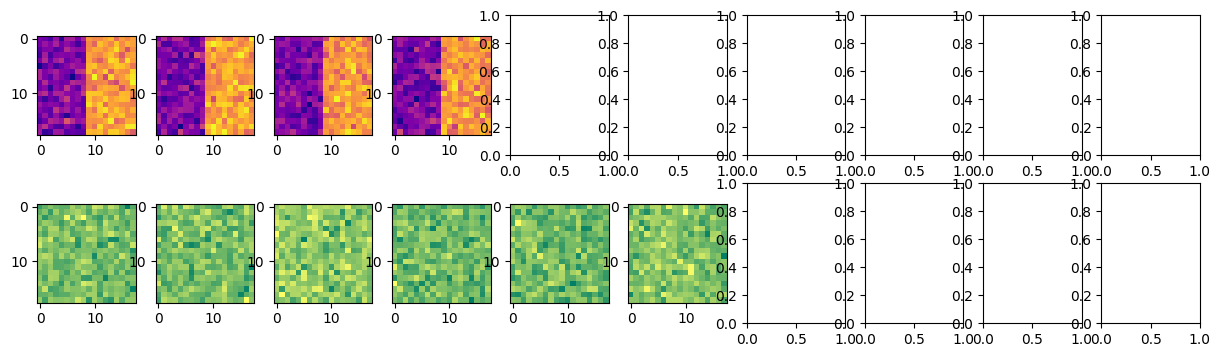

In [22]:
train1, trainlabel1 = load_matrix('Data1.mat')

# Display random images in a dynamic fashion
fig, ax = plt.subplots(2, 10, figsize=(15, 4))

s1i = 0
s2i = 0

for i in range(10):
  idx = random.randint(0, len(train1))

  if trainlabel1[idx] == 1:
    ax[0, s1i].imshow(train1[idx].reshape(18, 18), cmap='plasma')
    s1i += 1
  else:
    ax[1, s2i].imshow(train1[idx].reshape(18, 18), cmap='summer')
    s2i += 1

plt.show()

The difference between the two classes seems to be a vertical separation between the pixel strength of one side to the other, that is there are two classes:
*   Separated class
*   Mixed class

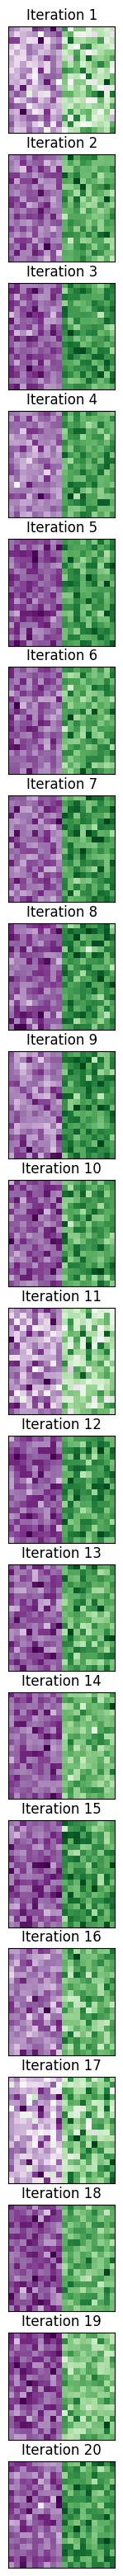

In [23]:
fig, ax = plt.subplots(20, figsize=(15, 40))

ws = []

for i in range(20):
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  w1 = perceptron_ans(train1, trainlabel1, max_epochs=100, step_size=1)
  ax[i].imshow(w1[1:].reshape(18, 18), cmap='PRGn')
  ax[i].set_title(f'Iteration {i+1}')
  ws.append(w1)
plt.show()

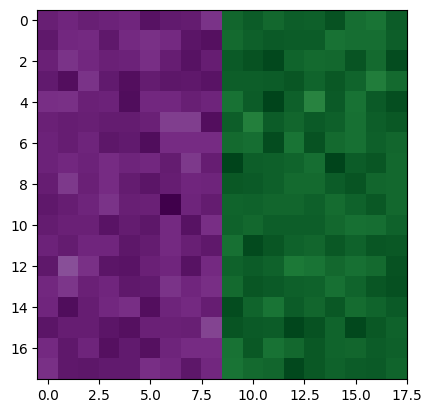

In [24]:
average = np.mean(ws, axis=0)
plt.imshow(average[1:].reshape(18, 18), cmap='PRGn')
plt.show()

It seems as if the weights differentiate between the left and right side of the image, which makes sense.

### 1E. Load Data2.mat and compare images

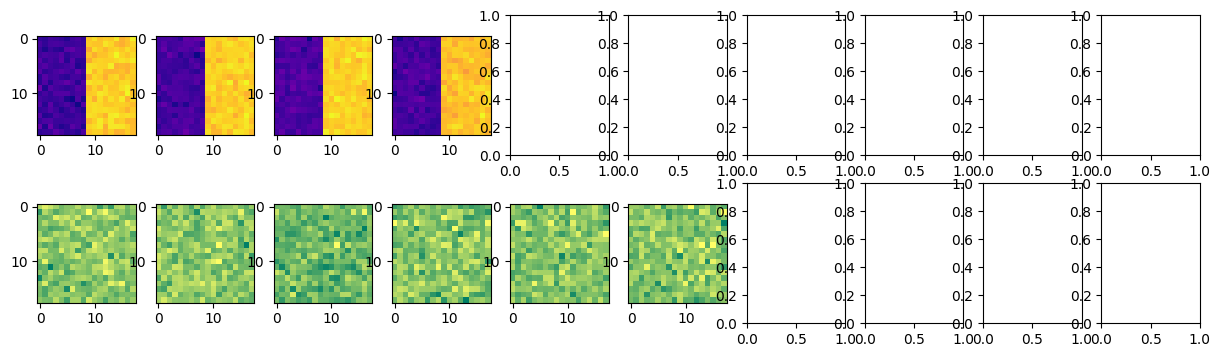

In [25]:
train2, trainlabel2 = load_matrix('Data2.mat')

# Display random images in a dynamic fashion
fig, ax = plt.subplots(2, 10, figsize=(15, 4))

s1i = 0
s2i = 0

for i in range(10):
  idx = random.randint(0, len(train2))

  if trainlabel2[idx] == 1:
    ax[0, s1i].imshow(train2[idx].reshape(18, 18), cmap='plasma')
    s1i += 1
  else:
    ax[1, s2i].imshow(train2[idx].reshape(18, 18), cmap='summer')
    s2i += 1

plt.show()

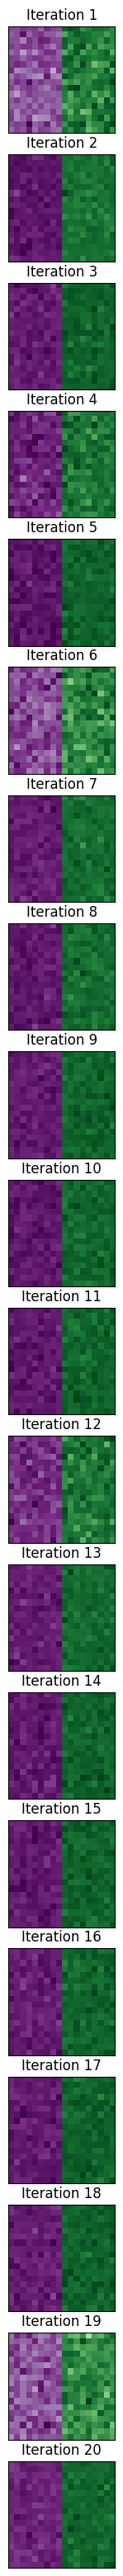

In [26]:
fig, ax = plt.subplots(20, figsize=(15, 40))

ws2 = []

for i in range(20):
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  w2 = perceptron_ans(train2, trainlabel2, max_epochs=100, step_size=1)
  ax[i].imshow(w2[1:].reshape(18, 18), cmap='PRGn')
  ax[i].set_title(f'Iteration {i+1}')
  ws2.append(w2)
plt.show()

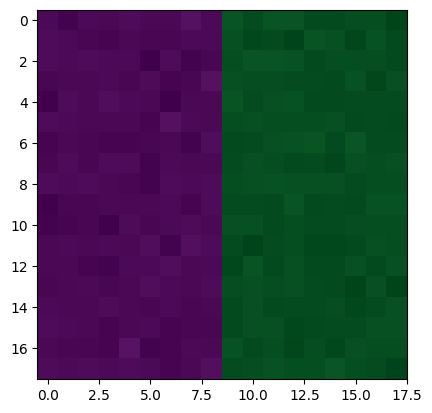

In [27]:
average2 = np.mean(ws2, axis=0)
plt.imshow(average2[1:].reshape(18, 18), cmap='PRGn')
plt.show()

The differentiation between the right and left side seems a lot less noisy... but it remains as expected. Based on the samples I received from sampling the original datasets, it seems there are overall more examples for the mixture class than there was for the stratified class, which by conjecture, should have made training more difficult in the sense that it's les robust to nuance, meaning also less noisy...

### 1f. Loadd Data3.mat and compare

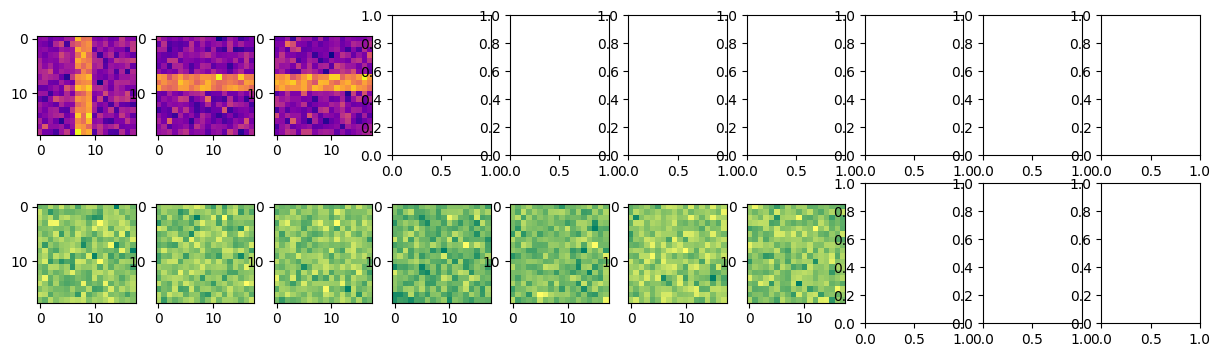

In [31]:
train3, trainlabel3 = load_matrix('Data3.mat')

# Display random images in a dynamic fashion
fig, ax = plt.subplots(2, 10, figsize=(15, 4))

s1i = 0
s2i = 0

for i in range(10):
  idx = random.randint(0, len(train3))

  if trainlabel3[idx] == 1:
    ax[0, s1i].imshow(train3[idx].reshape(18, 18), cmap='plasma')
    s1i += 1
  else:
    ax[1, s2i].imshow(train3[idx].reshape(18, 18), cmap='summer')
    s2i += 1

plt.show()

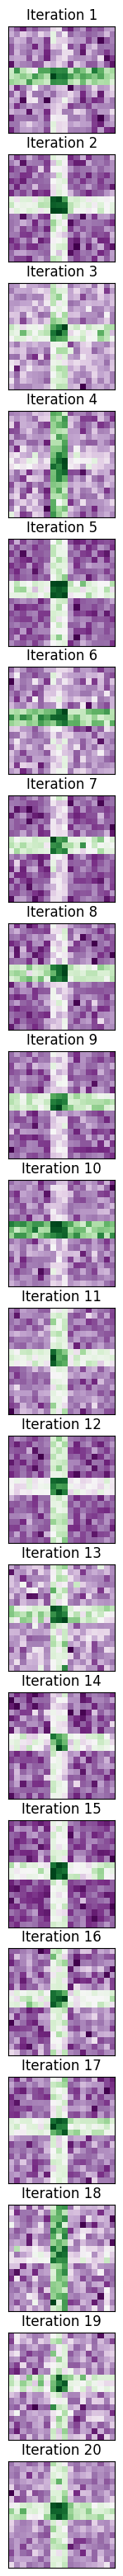

In [32]:
fig, ax = plt.subplots(20, figsize=(15, 40))

ws3 = []

for i in range(20):
  ax[i].set_xticks([])
  ax[i].set_yticks([])
  w3 = perceptron_ans(train3, trainlabel3, max_epochs=100, step_size=1)
  ax[i].imshow(w3[1:].reshape(18, 18), cmap='PRGn')
  ax[i].set_title(f'Iteration {i+1}')
  ws3.append(w3)
plt.show()

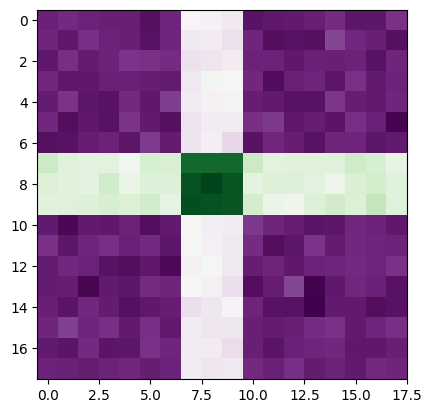

In [30]:
average3 = np.mean(ws3, axis=0)
plt.imshow(average3[1:].reshape(18, 18), cmap='PRGn')
plt.show()

This result makes sense, and the average weight vector resembles some composition of the hotspots of each image (that is, where you would look to determine which class the image falls in). It's cool that we can visualize it this way, and it classifies samples correctly because the corners are always on average different from the centers.